<a href="https://colab.research.google.com/github/JHL222/Python_StockPredict/blob/main/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

#데이터를 다운로드할 주식의 심볼을 지정 / 시작, 종료날짜 지정
ticker = 'TSLA'
start_date = '2024-05-25'
end_date = '2024-06-06'

#지정된 기간 동안의 주식 가격 데이터를 포함하는 데이터프레임을 반환
tesla_data = yf.download(ticker, start=start_date, end=end_date)
#데이터프레임의 인덱스를 재설정
tesla_data.reset_index(inplace=True)
#데이터프레임의 'Date'(날짜), 'Open'(시가), 'High'(고가), 'Low'(저가),
#'Close'(종가), 'Volume'(거래량) 열을 선택
tesla_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]


[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Volume
0,2024-05-28,176.399994,178.250000,173.160004,176.750000,59736600
1,2024-05-29,174.190002,178.149994,173.929993,176.190002,54782600
2,2024-05-30,178.580002,182.669998,175.380005,178.789993,77784800
3,2024-05-31,178.500000,180.320007,173.820007,178.080002,67314600
4,2024-06-03,178.130005,182.639999,174.490005,176.289993,68568900
5,2024-06-04,174.779999,177.759995,174.000000,174.770004,60056300
6,2024-06-05,175.350006,176.149994,172.130005,175.000000,57614800


In [ ]:
import yfinance as yf

ticker = 'NVDA'
start_date = '2024-05-25'
end_date = '2024-06-06'

nvidia_data = yf.download(ticker, start=start_date, end=end_date)
nvidia_data.reset_index(inplace=True)
nvidia_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]


[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Volume
0,2024-05-28,1102.439941,1149.390015,1098.829956,1139.010010,65272800
1,2024-05-29,1130.500000,1154.920044,1109.010010,1148.250000,55744200
2,2024-05-30,1146.500000,1158.189941,1096.630005,1105.000000,48735000
3,2024-05-31,1125.199951,1127.170044,1069.400024,1096.329956,61326300
4,2024-06-03,1136.209961,1150.000000,1120.030029,1150.000000,43839200
5,2024-06-04,1157.160034,1166.000000,1140.449951,1164.369995,40332400
6,2024-06-05,1183.709961,1224.489990,1174.680054,1224.400024,51210300


In [ ]:
import yfinance as yf
import pandas as pd

# 테슬라(TSLA) 티커 가져오기
ticker = 'TSLA'
tesla = yf.Ticker(ticker)

# 재무제표 데이터 가져오기
financials = tesla.financials
balance_sheet = tesla.balance_sheet
cashflow = tesla.cashflow

# 주요 재무 지표 가져오기
stats = tesla.info
pe_ratio = stats.get('trailingPE')
eps = stats.get('trailingEps')

# 필요한 데이터 프레임으로 정리하기
financial_data = pd.DataFrame({
    'Date': financials.columns,
    'Revenue': financials.loc['Total Revenue'],
    'Net Income': financials.loc['Net Income'],
    'EPS': eps,
    'PE Ratio': pe_ratio
}).reset_index(drop=True)

print(financial_data[['Date', 'Revenue', 'Net Income', 'EPS', 'PE Ratio']])


        Date        Revenue     Net Income  EPS   PE Ratio
0 2023-12-31  96773000000.0  14999000000.0  3.9  44.871796
1 2022-12-31  81462000000.0  12583000000.0  3.9  44.871796
2 2021-12-31  53823000000.0   5524000000.0  3.9  44.871796
3 2020-12-31  31536000000.0    721000000.0  3.9  44.871796


In [ ]:
import yfinance as yf
import pandas as pd

# 엔비디아(NVDA) 티커 가져오기
ticker = 'NVDA'
nvidia = yf.Ticker(ticker)

# 재무제표 데이터 가져오기
financials = nvidia.financials
balance_sheet = nvidia.balance_sheet
cashflow = nvidia.cashflow

# 주요 재무 지표 가져오기
stats = nvidia.info
pe_ratio = stats.get('trailingPE')
eps = stats.get('trailingEps')

# 필요한 데이터 프레임으로 정리하기
financial_data = pd.DataFrame({
    'Date': financials.columns,
    'Revenue': financials.loc['Total Revenue'],
    'Net Income': financials.loc['Net Income'],
    'EPS': eps,
    'PE Ratio': pe_ratio
}).reset_index(drop=True)

print(financial_data[['Date', 'Revenue', 'Net Income', 'EPS', 'PE Ratio']])


        Date        Revenue     Net Income    EPS  PE Ratio
0 2024-01-31  60922000000.0  29760000000.0  17.14  71.43524
1 2023-01-31  26974000000.0   4368000000.0  17.14  71.43524
2 2022-01-31  26914000000.0   9752000000.0  17.14  71.43524
3 2021-01-31  16675000000.0   4332000000.0  17.14  71.43524


In [ ]:
import requests
import json

def fetch_news(api_key, query, from_date, to_date, language='en', page_size=5):
    url = f'https://newsapi.org/v2/everything?q={query}&from={from_date}&to={to_date}&language={language}&pageSize={page_size}&apiKey={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        news_data = json.loads(response.text)
        articles = news_data['articles']
        formatted_articles = []
        for article in articles:
            formatted_article = {
                'date': article['publishedAt'][:10],
                'headline': article['title'],
                'content': article['description'],
                'source': article['source']['name']
            }
            formatted_articles.append(formatted_article)
        return formatted_articles
    else:
        print("Failed to fetch news:", response.status_code)

# API 키와 검색어 설정
api_key = ''
query = 'tech stocks'
from_date = '2024-05-25'
to_date = '2024-06-06'

# 뉴스 가져오기
news_articles = fetch_news(api_key, query, from_date, to_date)

# 가져온 뉴스 출력
for article in news_articles:
    print(article)


{'date': '2024-06-03', 'headline': "Inside China's plan for AI: shape reality and enforce its power", 'content': 'The Chinese government has final sign-off on large language models and the data they were trained on.', 'source': 'Business Insider'}
{'date': '2024-05-28', 'headline': 'The Stock Market Keeps Going Back and Forth on Interest Rates. How to Play It.', 'content': 'The S&P 500 is rising. Bond yields are up. Consumer confidence improves.', 'source': "Barron's"}
{'date': '2024-06-04', 'headline': "With Paramount's long and winding sales process coming to an end, here's what comes next for the media giant", 'content': "Paramount's lengthy sales process ends with a deal from Skydance valuing it at $8 billion.", 'source': 'Business Insider'}
{'date': '2024-05-28', 'headline': "As Windows 10's death looms, Microsoft recommends upgrading to Windows 11 because it will help you stay updated on celebrity gossip, stocks, and weather updates", 'content': "As Windows 10's end-of-support lo

In [ ]:
import requests
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def fetch_news(api_key, query, from_date, to_date, language='en', page_size=10):
    url = f'https://newsapi.org/v2/everything?q={query}&from={from_date}&to={to_date}&language={language}&pageSize={page_size}&apiKey={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        news_data = json.loads(response.text)
        articles = news_data['articles']
        formatted_articles = []
        for article in articles:
            formatted_article = {
                'date': article['publishedAt'][:10],
                'headline': article['title'],
                'content': article['description'],
                'source': article['source']['name']
            }
            formatted_articles.append(formatted_article)
        return formatted_articles
    else:
        print("Failed to fetch news:", response.status_code)

api_key = ''
query = 'tech stocks'
from_date = '2024-05-25'
to_date = '2024-06-06'

news_articles = fetch_news(api_key, query, from_date, to_date)

analyzer = SentimentIntensityAnalyzer()

for article in news_articles:
    headline_sentiment = analyzer.polarity_scores(article['headline'])
    if article['content']:
        content_sentiment = analyzer.polarity_scores(article['content'])
        print("Headline Sentiment:", headline_sentiment)
        print("Content Sentiment:", content_sentiment)
        print()
    else:
        print("Content is missing for this article:", article['headline'])


Headline Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Content Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Headline Sentiment: {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.6597}
Content Sentiment: {'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'compound': 0.7269}

Headline Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Content Sentiment: {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.34}

Headline Sentiment: {'neg': 0.226, 'neu': 0.629, 'pos': 0.145, 'compound': -0.3818}
Content Sentiment: {'neg': 0.117, 'neu': 0.671, 'pos': 0.212, 'compound': 0.5719}

Content is missing for this article: No one gets in trouble owning too many tech stocks: Chart of the Week
Headline Sentiment: {'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.25}
Content Sentiment: {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.7845}

Headline Sentiment: {'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'compound': -0.4019}
Content Sentiment: {'

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 14, 64)            17920     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 30369 (118.63 KB)
Trainable params: 30369 (118.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Loaded model weights from disk
1/1 [==============================] - 1s 1s/step
(12, 1) (12, 1)
(12,)
(12,)


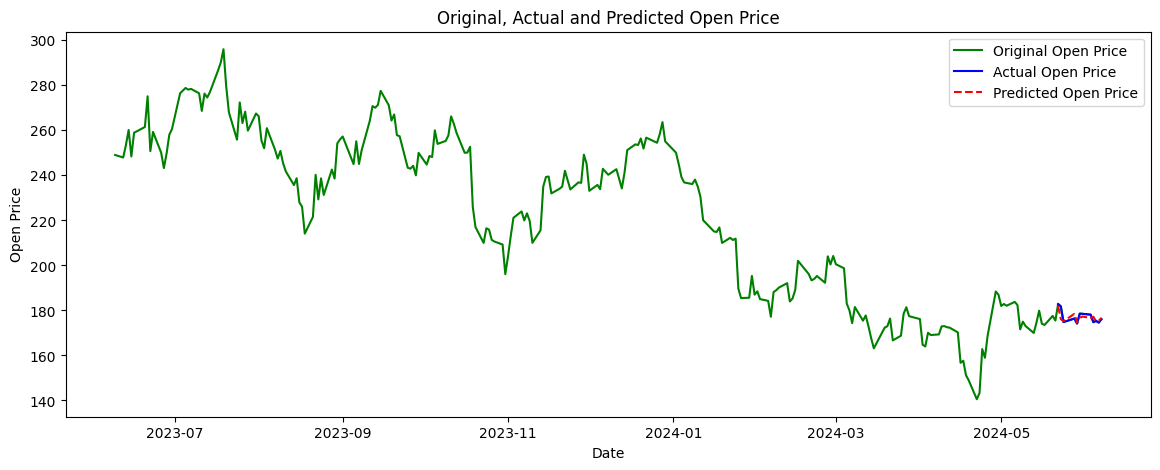

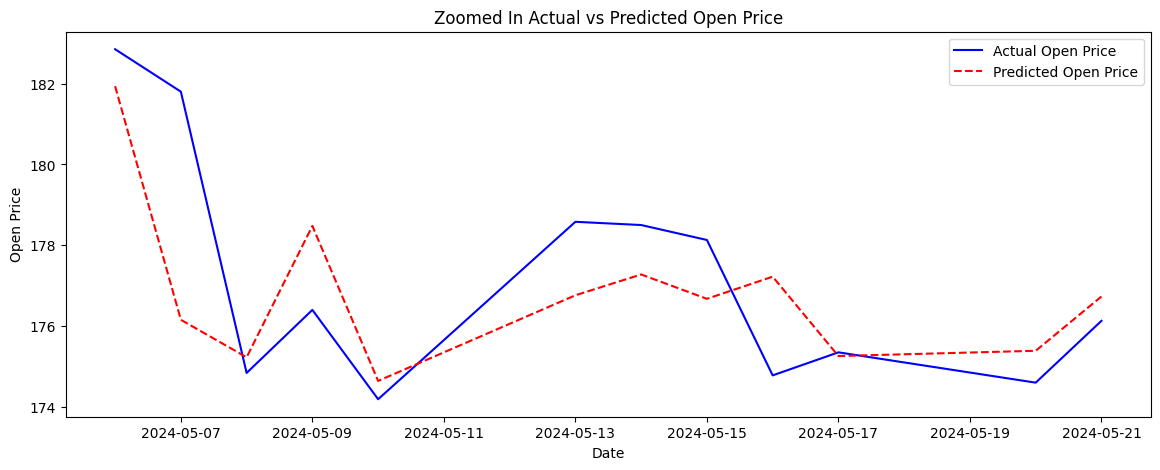

In [19]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

# 주식 데이터 로드
stock_data = pd.read_csv('sample_data/TSLA.csv')
# 'Adj Close' 열 제거
stock_data.drop(['Adj Close'], axis=1, inplace=True)

# 나중에 사용하기 위해 'Open' 가격 원본 저장
original_open = stock_data['Open'].values

# 나중에 그래프를 그리기 위해 날짜 분리
dates = pd.to_datetime(stock_data['Date'])

# 훈련에 사용할 열 목록
cols = list(stock_data)[1:6]

# 훈련 데이터로 사용할 5개의 열만 있는 새로운 데이터프레임 생성
stock_data = stock_data[cols].astype(float)

# 데이터 정규화
scaler = StandardScaler()
scaler = scaler.fit(stock_data)
stock_data_scaled = scaler.transform(stock_data)

# 데이터셋을 훈련 데이터와 테스트 데이터로 분할
n_train = int(0.9 * stock_data_scaled.shape[0])
train_data_scaled = stock_data_scaled[0: n_train]
train_dates = dates[0: n_train]

test_data_scaled = stock_data_scaled[n_train:]
test_dates = dates[n_train:]

# LSTM을 위한 데이터 재구성
pred_days = 1  # 예측할 미래 일수
seq_len = 14   # 시퀀스 길이 = 예측을 위해 사용하는 과거 일수
input_dim = 5  # 입력 차원 = ['Open', 'High', 'Low', 'Close', 'Volume']

trainX = []
trainY = []
testX = []
testY = []

# 훈련 데이터 준비
for i in range(seq_len, n_train - pred_days + 1):
    trainX.append(train_data_scaled[i - seq_len:i, 0:train_data_scaled.shape[1]])
    trainY.append(train_data_scaled[i + pred_days - 1:i + pred_days, 0])

# 테스트 데이터 준비
for i in range(seq_len, len(test_data_scaled) - pred_days + 1):
    testX.append(test_data_scaled[i - seq_len:i, 0:test_data_scaled.shape[1]])
    testY.append(test_data_scaled[i + pred_days - 1:i + pred_days, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# LSTM 모델 정의
model = Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True)) # 시퀀스 길이 및 입력 차원 지정
model.add(LSTM(32, return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.summary()

# 학습률 설정
learning_rate = 0.01
# 지정된 학습률로 Adam 옵티마이저 생성
optimizer = Adam(learning_rate=learning_rate)
# 모델을 사용자 지정 옵티마이저로 컴파일
model.compile(optimizer=optimizer, loss='mse')

# 저장 디렉토리 경로 설정
save_dir = './save_weights'
save_path = os.path.join(save_dir, 'lstm_weights.h5')

# 디렉토리가 없으면 생성
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 모델 가중치 로드 시도
try:
    model.load_weights(save_path)
    print("Loaded model weights from disk")
except:
    print("No weights found, training model from scratch")
    # 모델 학습
    history = model.fit(trainX, trainY, epochs=30, batch_size=32, validation_split=0.1, verbose=1)
    # 학습 후 모델 가중치 저장
    model.save_weights(save_path)

    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.show()

# 예측 수행
prediction = model.predict(testX)
print(prediction.shape, testY.shape)

# 예측을 위한 평균값으로 채워진 배열 생성
mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], prediction.shape[0], axis=0)

# 예측 값을 첫 번째 열에 대체
mean_values_pred[:, 0] = np.squeeze(prediction)

# 역변환 수행
y_pred = scaler.inverse_transform(mean_values_pred)[:, 0]
print(y_pred.shape)

# testY를 위한 평균값으로 채워진 배열 생성
mean_values_testY = np.repeat(scaler.mean_[np.newaxis, :], testY.shape[0], axis=0)

# testY를 첫 번째 열에 대체
mean_values_testY[:, 0] = np.squeeze(testY)

# 역변환 수행
testY_original = scaler.inverse_transform(mean_values_testY)[:, 0]
print(testY_original.shape)

# 그래프 그리기
plt.figure(figsize=(14, 5))

# 원본 'Open' 가격 그래프
plt.plot(dates, original_open, color='green', label='Original Open Price')

# 실제 가격과 예측 가격 그래프
plt.plot(test_dates[seq_len:], testY_original, color='blue', label='Actual Open Price')
plt.plot(test_dates[seq_len:], y_pred, color='red', linestyle='--', label='Predicted Open Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Original, Actual and Predicted Open Price')
plt.legend()
plt.show()

# 줌인된 그래프를 위한 시작 및 종료 인덱스 계산
zoom_start = len(test_dates) - 50
zoom_end = len(test_dates)

# 줌인된 그래프 생성
plt.figure(figsize=(14, 5))

# y 값의 인덱스를 seq_len 만큼 조정
# 조정된 인덱스가 유효한지 확인
adjusted_zoom_start = max(0, zoom_start - seq_len)
adjusted_zoom_end = max(0, zoom_end - seq_len)

# 그래프에 표시할 점 수 계산
num_points_to_plot = min(len(test_dates[zoom_start:zoom_end]),
                         len(testY_original[adjusted_zoom_start:adjusted_zoom_end]))

# Actual Open Price 그래프
plt.plot(test_dates[zoom_start:zoom_end][:num_points_to_plot],
         testY_original[adjusted_zoom_start:adjusted_zoom_end][:num_points_to_plot],
         color='blue',
         label='Actual Open Price')

# Predicted Open Price 그래프
plt.plot(test_dates[zoom_start:zoom_end][:num_points_to_plot],
         y_pred[adjusted_zoom_start:adjusted_zoom_end][:num_points_to_plot],
         color='red',
         linestyle='--',
         label='Predicted Open Price')

plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Zoomed In Actual vs Predicted Open Price')
plt.legend()
plt.show()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 14, 64)            17920     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 30369 (118.63 KB)
Trainable params: 30369 (118.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Loaded model weights from disk
1/1 [==============================] - 1s 1s/step
(12, 1) (12, 1)
(12,)
(12,)


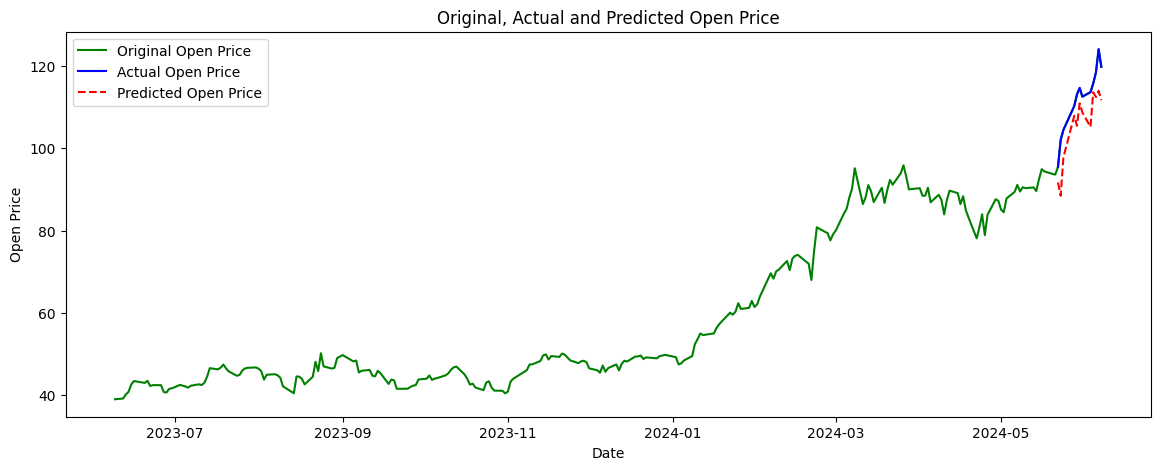

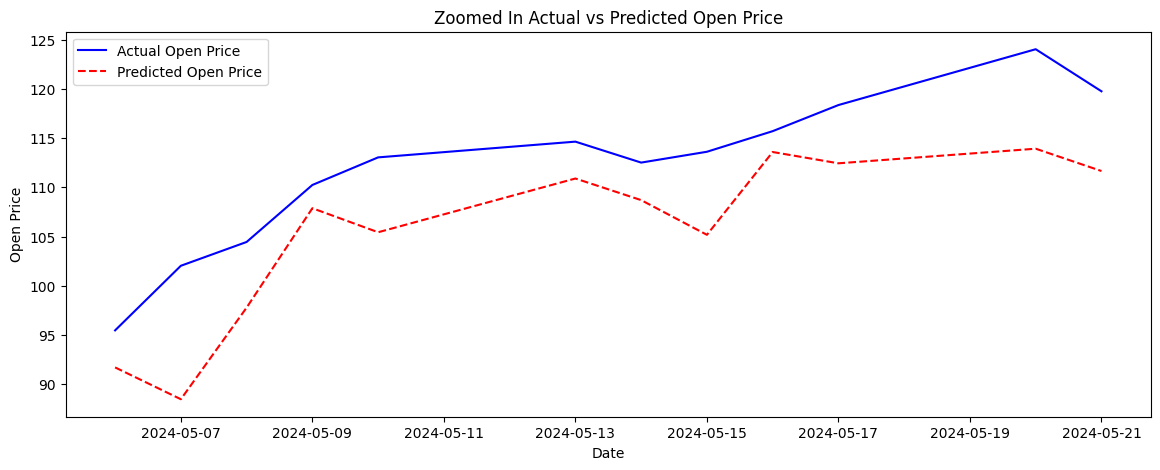

In [17]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

stock_data = pd.read_csv('sample_data/NVDA.csv')
stock_data.drop(['Adj Close'], axis=1, inplace=True)

original_open = stock_data['Open'].values

dates = pd.to_datetime(stock_data['Date'])

cols = list(stock_data)[1:6]

stock_data = stock_data[cols].astype(float)

scaler = StandardScaler()
scaler = scaler.fit(stock_data)
stock_data_scaled = scaler.transform(stock_data)

n_train = int(0.9 * stock_data_scaled.shape[0])
train_data_scaled = stock_data_scaled[0: n_train]
train_dates = dates[0: n_train]

test_data_scaled = stock_data_scaled[n_train:]
test_dates = dates[n_train:]

pred_days = 1
seq_len = 14
input_dim = 5

trainX = []
trainY = []
testX = []
testY = []

for i in range(seq_len, n_train - pred_days + 1):
    trainX.append(train_data_scaled[i - seq_len:i, 0:train_data_scaled.shape[1]])
    trainY.append(train_data_scaled[i + pred_days - 1:i + pred_days, 0])

for i in range(seq_len, len(test_data_scaled) - pred_days + 1):
    testX.append(test_data_scaled[i - seq_len:i, 0:test_data_scaled.shape[1]])
    testY.append(test_data_scaled[i + pred_days - 1:i + pred_days, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

model = Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.summary()

learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

save_dir = './save_weights'
save_path = os.path.join(save_dir, 'lstm_weights.h5')

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

try:
    model.load_weights(save_path)
    print("Loaded model weights from disk")
except:
    print("No weights found, training model from scratch")
    history = model.fit(trainX, trainY, epochs=30, batch_size=32, validation_split=0.1, verbose=1)
    model.save_weights(save_path)

    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.show()

prediction = model.predict(testX)
print(prediction.shape, testY.shape)

mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], prediction.shape[0], axis=0)
mean_values_pred[:, 0] = np.squeeze(prediction)
y_pred = scaler.inverse_transform(mean_values_pred)[:, 0]
print(y_pred.shape)

mean_values_testY = np.repeat(scaler.mean_[np.newaxis, :], testY.shape[0], axis=0)
mean_values_testY[:, 0] = np.squeeze(testY)
testY_original = scaler.inverse_transform(mean_values_testY)[:, 0]
print(testY_original.shape)

plt.figure(figsize=(14, 5))

plt.plot(dates, original_open, color='green', label='Original Open Price')
plt.plot(test_dates[seq_len:], testY_original, color='blue', label='Actual Open Price')
plt.plot(test_dates[seq_len:], y_pred, color='red', linestyle='--', label='Predicted Open Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Original, Actual and Predicted Open Price')
plt.legend()
plt.show()

zoom_start = len(test_dates) - 50
zoom_end = len(test_dates)

plt.figure(figsize=(14, 5))

adjusted_zoom_start = max(0, zoom_start - seq_len)
adjusted_zoom_end = max(0, zoom_end - seq_len)

num_points_to_plot = min(len(test_dates[zoom_start:zoom_end]),
                         len(testY_original[adjusted_zoom_start:adjusted_zoom_end]))

plt.plot(test_dates[zoom_start:zoom_end][:num_points_to_plot],
         testY_original[adjusted_zoom_start:adjusted_zoom_end][:num_points_to_plot],
         color='blue',
         label='Actual Open Price')

plt.plot(test_dates[zoom_start:zoom_end][:num_points_to_plot],
         y_pred[adjusted_zoom_start:adjusted_zoom_end][:num_points_to_plot],
         color='red',
         linestyle='--',
         label='Predicted Open Price')

plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Zoomed In Actual vs Predicted Open Price')
plt.legend()
plt.show()
